<a href="https://colab.research.google.com/github/margazadasha/Machine-learning-ML/blob/main/%D0%9C%D0%B0%D1%80%D0%B3%D0%B0%D0%B7%D0%B0_4_6%D0%A4%D0%86%D0%A2_%D0%9F%D0%A0%E2%84%969_%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №9
Згорткові нейронні мережі.
#Завдання 1. Створити нейронну мережу (модель) з використанням згорткових шарів для датасета cifar 10.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


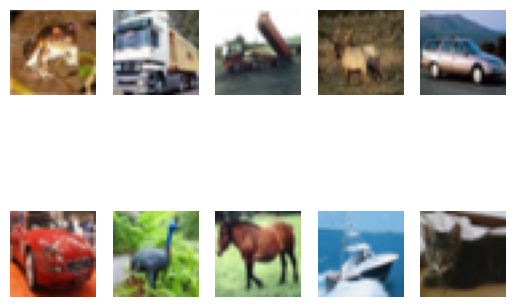

In [ ]:
#Завантаження датасету CIFAR-10.
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

#Виведення перших 10 зображень.
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [ ]:
#Нормалізація піксельних значень.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Переведення міток у категоріальний формат.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
#Створення моделі (згорткової нейронної мережі).
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

#Виведення summary моделі.
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Колбеки для ранньої зупинки та зменшення швидкості навчання.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

In [ ]:
#Компіляція та навчання моделі.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2797 - loss: 1.9186 - val_accuracy: 0.4829 - val_loss: 1.4443 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5080 - loss: 1.3748 - val_accuracy: 0.5896 - val_loss: 1.1437 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5811 - loss: 1.1903 - val_accuracy: 0.6371 - val_loss: 1.0299 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6289 - loss: 1.0623 - val_accuracy: 0.6569 - val_loss: 0.9705 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6580 - loss: 0.9808 - val_accuracy: 0.6841 - val_loss: 0.8973 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6867 - loss: 0.8965 - val_accuracy: 0.6851 - val_loss: 0.9082 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7087 - loss: 0.8419 

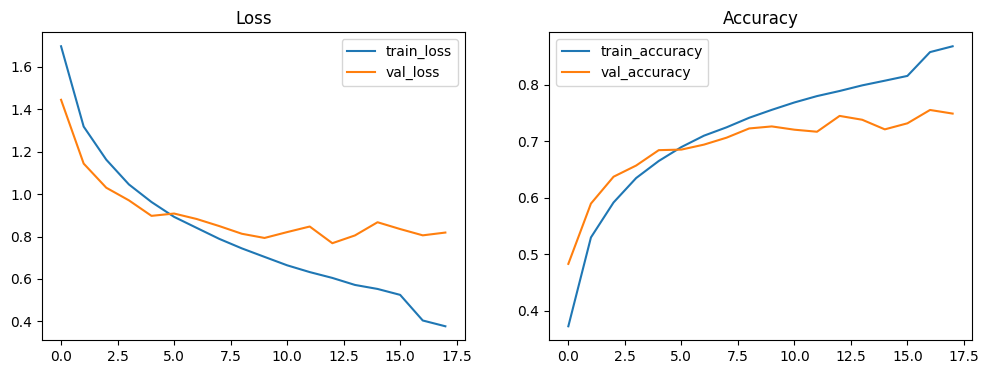

In [ ]:
#Графіки функцій втрат і точності.
plt.figure(figsize=(12, 4))

#Графік функції втрат.
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

# Графік функції точності.
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy')
plt.legend()

plt.show()

In [ ]:
#Класифікаційний звіт.
from sklearn.metrics import classification_report
import numpy as np

y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1000
           1       0.88      0.84      0.86      1000
           2       0.64      0.63      0.63      1000
           3       0.62      0.51      0.56      1000
           4       0.70      0.72      0.71      1000
           5       0.68      0.64      0.66      1000
           6       0.79      0.83      0.81      1000
           7       0.73      0.81      0.77      1000
           8       0.88      0.80      0.84      1000
           9       0.80      0.83      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



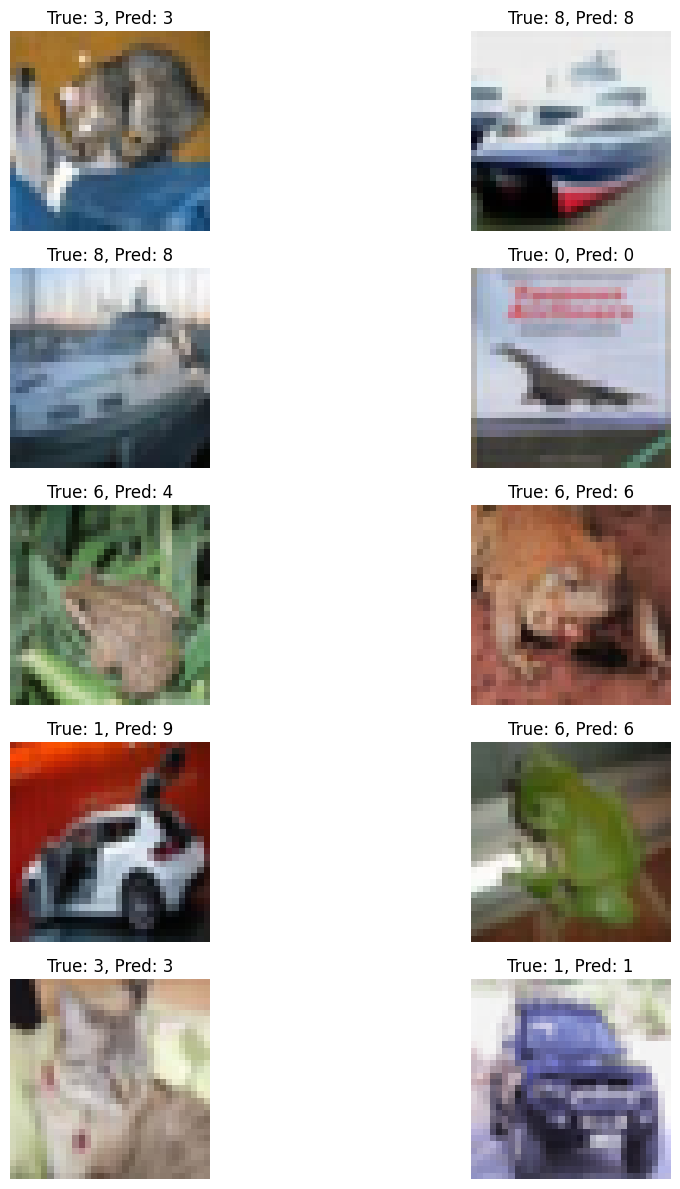

In [ ]:
#Візуалізація перших 10 тестових зображень з прогнозованими та справжніми класами.
plt.figure(figsize=(12, 12))  #Збільшення розміру фігури для більш чітких зображень.
for i in range(10):
    plt.subplot(5, 2, i+1)  #Розміщення зображень у сітці.
    plt.imshow(x_test[i], interpolation='nearest')  #Використання інтерполяції для покращення якості.
    plt.title(f"True: {y_true[i]}, Pred: {y_pred[i]}")
    plt.axis('off')

plt.tight_layout()  #Оптимізація розміщення графіків.
plt.show()

Висновок: В даному завданні було створено згорткову нейронну мережу для класифікації зображень із датасету CIFAR-10. Розроблена модель включала кілька згорткових і pooling шарів, а також механізми регуляризації (Dropout) для зменшення перенавчання. Під час навчання використовувались колбеки для ранньої зупинки та зменшення швидкості навчання. Після тренування моделі було збудовано графіки втрат і точності, отримано класифікаційний звіт та проведено візуалізацію результатів розпізнавання. Модель продемонструвала адекватну точність у вирішенні задачі класифікації зображень.